# Задача идентификации модели по последовательности состояний системы 
# Русская Алиса

In [44]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [77]:
with open('alice_ru.txt', 'r', encoding='utf-8', newline='') as f:
    text = f.read().lower()


In [64]:
text[:1000]

"июльский полдень золотой\n    сияет так светло,\n    в неловких маленьких руках\n    упрямится весло,\n    и нас теченьем далеко\n    от дома унесло.\n\n    безжалостные! в жаркий день,\n    в такой сонливый час,\n    когда бы только подремать,\n    не размыкая глаз,\n    вы требуете, чтобы я\n    придумывал рассказ.\n\n    и первая велит начать\n    его без промедленья,\n    вторая просит: ``поглупей\n    пусть будут приключенья''.\n    а третья прерывает нас\n    сто раз в одно мгновенье.\n\n    но вот настала тишина,\n    и, будто бы во сне,\n    неслышно девочка идет\n    по сказочной стране\n    и видит множество чудес\n    в подземной глубине.\n\n    но ключ фантазии иссяк --\n    не бьет его струя.\n    -- конец я после расскажу,\n    даю вам слово я!\n    -- настало после! -- мне кричит\n    компания моя.\n\n    и тянется неспешно нить\n    моей волшебной сказки,\n    к закату дело, наконец,\n    доходит до развязки.\n    идем домой. вечерний луч\n    смягчил дневные краски.\n

In [65]:
text = re.sub('[^а-я]','', text)

In [66]:
text

'июльскийполденьзолотойсияеттаксветловнеловкихмаленькихрукахупрямитсявеслоинастеченьемдалекоотдомаунеслобезжалостныевжаркийденьвтакойсонливыйчаскогдабытолькоподрематьнеразмыкаяглазвытребуетечтобыяпридумывалрассказиперваявелитначатьегобезпромедленьявтораяпроситпоглупейпустьбудутприключеньяатретьяпрерываетнассторазводномгновеньеновотнасталатишинаибудтобывосненеслышнодевочкаидетпосказочнойстранеивидитмножествочудесвподземнойглубиненоключфантазиииссякнебьетегоструяконецяпослерасскажудаювамсловоянасталопослемнекричиткомпаниямояитянетсянеспешнонитьмоейволшебнойсказкикзакатуделонаконецдоходитдоразвязкиидемдомойвечернийлучсмягчилдневныекраскиалисасказкудетскихднейхранидосединывтомтайникегдетыхранишьмладенческиесныкакстранникбережетцветокдалекойстороныглававнизпокроличьейалисенаскучилосидетьссестройбезделанаберегурекиразокдругойоназаглянулавкнижкукоторуючиталасестранотамнебылоникартинокниразговоровчтотолкувкнижкеподумалаалисаесливнейнетникартинокниразговоровонасиделаиразмышляланевстатьлиейинена

In [67]:
# определим алфавит
Rus = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
# создадим словарь с ключами буквами и значениями - номерами от 0
POS = {l: i for i, l in enumerate(Rus)}
POS


{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ж': 6,
 'з': 7,
 'и': 8,
 'й': 9,
 'к': 10,
 'л': 11,
 'м': 12,
 'н': 13,
 'о': 14,
 'п': 15,
 'р': 16,
 'с': 17,
 'т': 18,
 'у': 19,
 'ф': 20,
 'х': 21,
 'ц': 22,
 'ч': 23,
 'ш': 24,
 'щ': 25,
 'ъ': 26,
 'ы': 27,
 'ь': 28,
 'э': 29,
 'ю': 30,
 'я': 31}

In [68]:
# создадим пока матрицу из нолей, куда запишем вероятности переходов
probabilities = np.zeros((len(Rus), len(Rus)))

In [69]:

# бежим по символам (берем предыдущий и текущий)
for cp, cn in zip(text[:-1], text[1:]):
    # счетчик набегает по количеству встреченных переходов
    probabilities[POS[cp], POS[cn]] += 1

In [70]:
# имеем все тот же массим, но заполненный целыми числами
print(probabilities[0, 0])
print(probabilities[2, 18])
print(probabilities[20, 3])


270.0
78.0
0.0


In [71]:

# делим значения в столбцах матрицы на общее кол-во встреченных переходов от всех букв к рассмтариваемой
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

probabilities

array([[0.02693267, 0.01326683, 0.05426434, ..., 0.00488778, 0.01047382,
        0.02793017],
       [0.04868421, 0.00131579, 0.00328947, ..., 0.00526316, 0.        ,
        0.04539474],
       [0.18729268, 0.00127584, 0.00791018, ..., 0.00561368, 0.        ,
        0.00510334],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02564103, 0.07925408, 0.05361305, ..., 0.00699301, 0.004662  ,
        0.002331  ],
       [0.02545069, 0.03022269, 0.07104984, ..., 0.0116649 , 0.00318134,
        0.01696713]])

In [72]:
# получили массим, в котором указаны вероятности (количество благоприятных исходов ко всем исходам)
print(probabilities[0, 0])
print(probabilities[2, 18])
print(probabilities[20, 3])
print(probabilities.shape )

0.026932668329177057
0.01990303648890023
0.0
(32, 32)


In [73]:
# переводим все это в датафрейм
df = pd.DataFrame(probabilities, index=(c for c in Rus), columns=(c for c in Rus))

In [74]:
df.head()

,а,б,в,г,д,е,ж,з,и,й,...,ц,ч,ш,щ,ъ,ы,ь,э,ю,я
а,0.026933,0.013267,0.054264,0.016958,0.037905,0.024140,0.014663,0.071421,0.017556,0.010075,...,0.000599,0.025835,0.010175,0.003591,0.000000,0.000000,0.000000,0.004888,0.010474,0.027930
б,0.048684,0.001316,0.003289,0.000000,0.002632,0.165132,0.000658,0.000000,0.076974,0.000000,...,0.000000,0.000000,0.000000,0.005921,0.011184,0.247368,0.003289,0.005263,0.000000,0.045395
в,0.187293,0.001276,0.007910,0.008165,0.019648,0.127073,0.001786,0.020669,0.082674,0.000000,...,0.001276,0.005869,0.011483,0.000000,0.000000,0.060985,0.003828,0.005614,0.000000,0.005103
г,0.059955,0.003394,0.006222,0.001131,0.077489,0.031674,0.000000,0.002828,0.048077,0.000000,...,0.000566,0.004525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000566
д,0.183824,0.004779,0.034559,0.001471,0.005147,0.182721,0.000000,0.002574,0.076471,0.000000,...,0.009926,0.001103,0.000000,0.000000,0.000000,0.022794,0.019485,0.000735,0.002206,0.012132


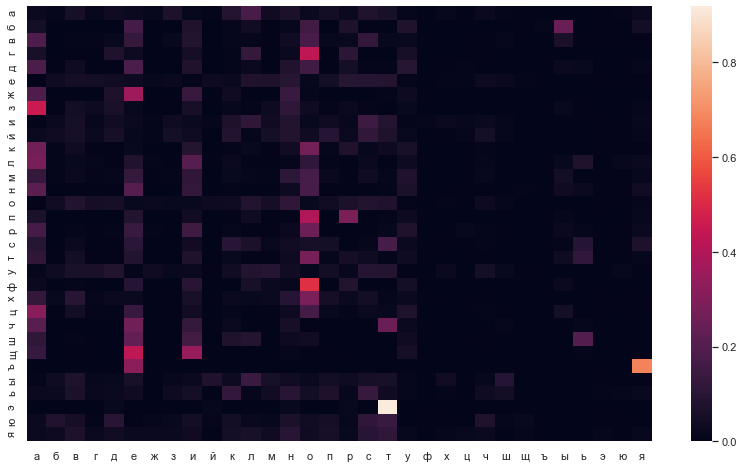

In [75]:
# строим тепловую карту. Высокое значение для последовательности 
#"qu". 
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [78]:
# посчитаем число уникальных слов
len(set(text.split(' ')))

7741

In [79]:
# грубо прикинем для каждой буквы вероятность того, что с нее начинается случайное слово
unique_words = list(set(text.split(' ')))
unique_words[:10]

['',
 'надежды',
 'он,',
 'под',
 'бы',
 'ты,\nконечно,',
 'обратиться',
 'глупец!',
 'шагу.\n',
 'нее\nесть']

In [80]:
# удалим первый элемент
del unique_words[0]

In [81]:

# посчитаем, сколько уникальных слов начинается на каждую букву
count_dict = {i:len(list(filter(lambda word: word[0] == i, unique_words))) for i in Rus}
count_dict

{'а': 106,
 'б': 265,
 'в': 606,
 'г': 263,
 'д': 394,
 'е': 84,
 'ж': 67,
 'з': 309,
 'и': 198,
 'й': 0,
 'к': 466,
 'л': 146,
 'м': 332,
 'н': 557,
 'о': 441,
 'п': 1096,
 'р': 275,
 'с': 851,
 'т': 306,
 'у': 277,
 'ф': 32,
 'х': 80,
 'ц': 24,
 'ч': 157,
 'ш': 73,
 'щ': 7,
 'ъ': 0,
 'ы': 0,
 'ь': 0,
 'э': 50,
 'ю': 6,
 'я': 51}

In [82]:
# Можно проанализировать аномалии

In [83]:
# преобразуем значения в массив
prob_array =  np.array(list(count_dict.values()))
prob_array

array([ 106,  265,  606,  263,  394,   84,   67,  309,  198,    0,  466,
        146,  332,  557,  441, 1096,  275,  851,  306,  277,   32,   80,
         24,  157,   73,    7,    0,    0,    0,   50,    6,   51])

In [84]:
# чтобы посчитать вероятности
prob_array = prob_array / np.sum(prob_array)

In [85]:

prob_array

array([0.01409762, 0.03524405, 0.08059582, 0.03497806, 0.05240059,
       0.0111717 , 0.00891076, 0.04109589, 0.02633329, 0.        ,
       0.06197633, 0.01941748, 0.04415481, 0.074079  , 0.05865142,
       0.14576406, 0.03657401, 0.11317994, 0.0406969 , 0.03684001,
       0.00425589, 0.01063971, 0.00319191, 0.02088044, 0.00970874,
       0.00093097, 0.        , 0.        , 0.        , 0.00664982,
       0.00079798, 0.00678282])

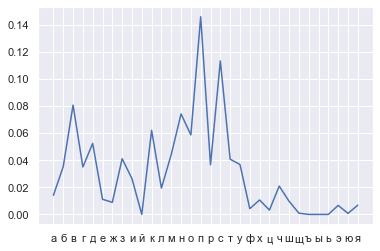

In [87]:

#Буква S - чемпион, с нее начинается больше всего слов (11% случаев)
x = [x for x in Rus]
y = prob_array
plt.plot(x,y)

**Теорема о состояниях марковской цепи**

Для любого натурального $n$ и любых $i_0,i_1,…,i_{n−1},i,j$

$P(X_0=i_0,X_1=i_1,…,X_n=i_n)=α_{i_0}p_{i_0i_1}…p{i_{n−1}i_n}.$

Пример: Пусть вероятность начального состояния цепи для букв английского алфавита равна $\dfrac{1}{26}$.
Чему равна вероятность наблюдать строку "hello"?

In [95]:
string = "привет"
proba = 1.0 / 26
for cp, cn in zip(string[1:], string[:-1]):
    proba *= probabilities[POS[cp], POS[cn]]
print(proba)

7.674194228223546e-10


**Следствие.** Для любого натурального $n$ и любого $i_n \in E$

$P(X_n=i_n) = \sum \limits_{i_0,…,i_{n−1} \in E} \alpha i_0p_{i_0i_1}…p_{i_{n−1}i_n}$.

Но обычно нас не интересует полный путь, а лишь начало и конец. Поэтому вводят вероятность перейти из состояния $i$ в состояние $j$ за $n$ шагов:

$p_{ij}^{(n)}=P(X_n=j|X_0=i)$

Чему равна эта вероятность?

$P(X_n=j|X_0=i)=\dfrac{P(X_n=j,X_0=i)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} \dfrac{P(X_0=i, X_1=i_1,...,X_{n-1}=i_{n-1}, X_n = j)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} p_{ii_1}...p_{i_{n-1}j}$

Если мы посмотрим на случай $n=2$, то полученное выражение очень похоже на скалярное произведение строк матрицы переходной вероятности. Оказывается, что это не так уж и далеко от истины.

**Теорема.** Пусть $P^{(n)}=(p_{ij}^{(n)}) i,j \in E$. Тогда $P^{(n)}=P⋅P⋅…⋅P=P^n$

**Вопрос:** как подсчитать вероятность, что слово из 3 букв начинается на букву "h" и заканчивается на букву "y"?

In [94]:
start = POS['п']
end = POS['р']
prior = 1. / len(Rus)
for c in Rus:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['п', c, 'р']), proba)

пар 5.622397473796644e-05
пгр 1.1749686607277866e-06
пер 0.00025636655969742974
пир 2.1600152325904406e-05
пкр 1.0569757705211489e-05
плр 9.284870025746943e-07
пмр 1.4533012918583258e-07
пнр 7.849756439252393e-07
пор 0.0008039930972001267
ппр 6.479912625923343e-06
прр 6.70227830944425e-06
пср 7.724435338898135e-08
птр 1.2615172364842983e-05
пур 1.4453335908095981e-05
пцр 2.604639360476531e-07
пыр 1.397198773919245e-05
пьр 3.2854703191035304e-07
пяр 9.859512896242868e-06


# Генерирование выборок из марковской цепи

Как создать реализацию длины $N$ из марковской цепи?
Сгенерировать начальное состояние согласно распределению $\alpha_i≡P(X_0=i)$, положить $n \leftarrow 0$.
Пока $n<N$, повторять:
- Имея контекст $X_n$, сгенерировать состояние $X_{n+1}$ из распределения $P(X_{n+1}|X_n)$
- Положить $n \leftarrow n+1$

In [96]:
s = []
start = np.random.choice(list(Rus))
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(Rus), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

шилнорако


# Задача ранжирования

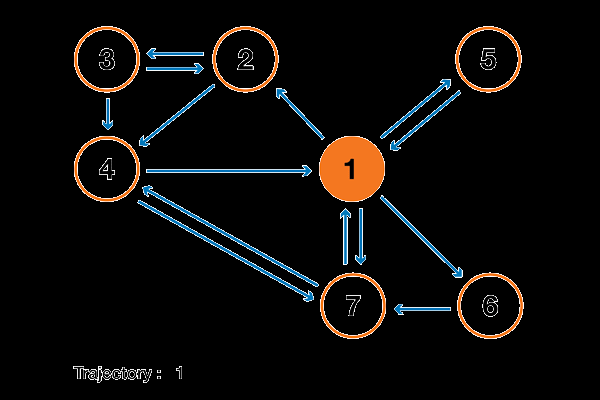

In [100]:
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
%%file graph_data.txt
1 -> 2;
1 -> 7;
1 -> 6;
1 -> 5;
2 -> 4;
2 -> 3;
3 -> 4;
3 -> 2;
4 -> 1;
4 -> 7;
5 -> 1;
6 -> 7;
7 -> 4;
7 -> 1;

Overwriting graph_data.txt


In [102]:
import numpy as np
from operator import itemgetter         

infile = 'graph_data.txt'              # ввод файла данных
alphabet = '1234567'    # 

n = 7
Q = np.zeros((n, n), dtype=int)            # вернуть новый массив заданной формы и типа, заполненный нулями (матрица n на n)
f = open(infile, 'r')                      
edges = f.readlines()                      # возвращает список, содержащий строки файла;
f.close()                                  
for edge in edges:                          
    from_node, to_node = re.findall('\w', edge)    # перебрать строки файла: вернуть список всех совпадений за один шаг
    i, j = alphabet.index(from_node), alphabet.index(to_node)
    Q[i, j] = 1
P = np.empty((n, n))                      # вернуть новый массив заданной формы и типа, без инициализации записей
for i in range(n):
    P[i, :] = Q[i, :] / Q[i, :].sum()     # Построить P (i, j)
mc = qe.MarkovChain(P)
r = mc.stationary_distributions[0]
ranked_pages = {alphabet[i] : r[i] for i in range(n)}

print('Rankings\n ***')                   # сортируем полученный список
for name, rank in sorted(ranked_pages.items(), key=itemgetter(1), reverse=1):
    print (f'{name}: {rank:.4}')

Rankings
 ***
1: 0.2857
7: 0.2381
4: 0.1905
2: 0.09524
5: 0.07143
6: 0.07143
3: 0.04762
